In [8]:
# Importing data (46 classifications)
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
print(len(train_data))
len(test_data)

# Decode from integer numbers to texts
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_newswire

8982
557056/550378 [==============================] - 0s 0us/step


'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [15]:
# Encoding the data 
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [19]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [21]:
# Training the model
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 30ms/step - loss: 3.1685 - accuracy: 0.4042 - val_loss: 1.7362 - val_accuracy: 0.6480
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 1.4699 - accuracy: 0.7013 - val_loss: 1.3076 - val_accuracy: 0.7130
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 1.0736 - accuracy: 0.7687 - val_loss: 1.1680 - val_accuracy: 0.7440
Epoch 4/20
16/16 [==============================] - 0s 19ms/step - loss: 0.8610 - accuracy: 0.8135 - val_loss: 1.0696 - val_accuracy: 0.7680
Epoch 5/20
16/16 [==============================] - 0s 16ms/step - loss: 0.6623 - accuracy: 0.8609 - val_loss: 1.0253 - val_accuracy: 0.7850
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5471 - accuracy: 0.8849 - val_loss: 0.9650 - val_accuracy: 0.7970
Epoch 7/20
16/16 [==============================] - 0s 16ms/step - loss: 0.4296 - accuracy: 0.9100 - val_loss: 0.9375 - val_accuracy: 0.8060
Epoch 8/20
16

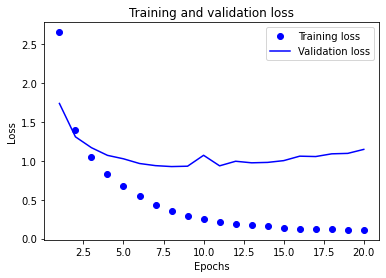

In [22]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

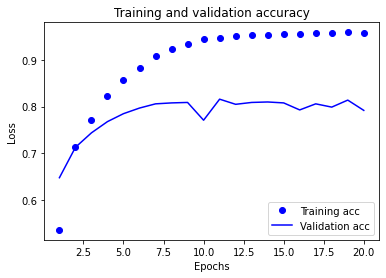

In [24]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
# Retraining the model with 9 epochs
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 23ms/step - loss: 3.1862 - accuracy: 0.3566 - val_loss: 1.7873 - val_accuracy: 0.6440
Epoch 2/9
16/16 [==============================] - 0s 16ms/step - loss: 1.5370 - accuracy: 0.6971 - val_loss: 1.3130 - val_accuracy: 0.7220
Epoch 3/9
16/16 [==============================] - 0s 18ms/step - loss: 1.0717 - accuracy: 0.7739 - val_loss: 1.1482 - val_accuracy: 0.7480
Epoch 4/9
16/16 [==============================] - 0s 16ms/step - loss: 0.8424 - accuracy: 0.8282 - val_loss: 1.0323 - val_accuracy: 0.7920
Epoch 5/9
16/16 [==============================] - 0s 14ms/step - loss: 0.6856 - accuracy: 0.8662 - val_loss: 0.9638 - val_accuracy: 0.8030
Epoch 6/9
16/16 [==============================] - 0s 16ms/step - loss: 0.5324 - accuracy: 0.8923 - val_loss: 0.9297 - val_accuracy: 0.8060
Epoch 7/9
16/16 [==============================] - 0s 16ms/step - loss: 0.4362 - accuracy: 0.9091 - val_loss: 0.9010 - val_accuracy: 0.8140
Epoch 8/9
16/16 [===

In [27]:
results

[0.9882953763008118, 0.7862867116928101]